In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [39]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "/content/drive/MyDrive/Prodigy ML/training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 4004 images belonging to 2 classes.


In [42]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/drive/MyDrive/Prodigy ML/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 2023 images belonging to 2 classes.


In [43]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [44]:
from tensorflow.keras.regularizers import l2

In [45]:
cnn = tf.keras.models.Sequential()

In [47]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [48]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [49]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [50]:
cnn.add(tf.keras.layers.Flatten())

In [51]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [52]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [53]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [54]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [55]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
126/126 [==============================] - 1028s 8s/step - loss: 1.0025 - accuracy: 0.5100 - val_loss: 0.9227 - val_accuracy: 0.5393
Epoch 2/15
126/126 [==============================] - 85s 674ms/step - loss: 0.8839 - accuracy: 0.5734 - val_loss: 0.8802 - val_accuracy: 0.5205
Epoch 3/15
126/126 [==============================] - 74s 589ms/step - loss: 0.8073 - accuracy: 0.6301 - val_loss: 0.7971 - val_accuracy: 0.6728
Epoch 4/15
126/126 [==============================] - 55s 438ms/step - loss: 0.7286 - accuracy: 0.6623 - val_loss: 0.6890 - val_accuracy: 0.6955
Epoch 5/15
126/126 [==============================] - 59s 468ms/step - loss: 0.6703 - accuracy: 0.6891 - val_loss: 0.6847 - val_accuracy: 0.6906
Epoch 6/15
126/126 [==============================] - 54s 427ms/step - loss: 0.6560 - accuracy: 0.6901 - val_loss: 0.6512 - val_accuracy: 0.7257
Epoch 7/15
126/126 [==============================] - 55s 437ms/step - loss: 0.6196 - accuracy: 0.7183 - val_loss: 0.7127 - val_acc

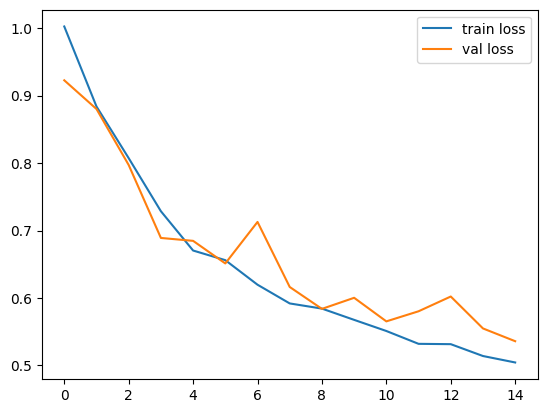

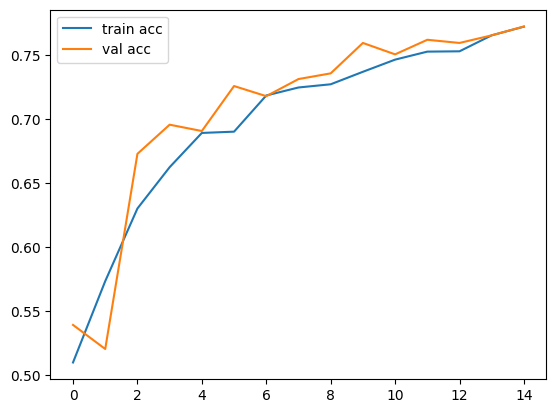

In [56]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [57]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

In [58]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Prodigy ML/training_set/dogs/dog.1009.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)


1/1 [==============================] - 0s 127ms/step


In [59]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
